In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm
from scipy.optimize import fsolve

In [2]:
w0 = - ( 2.**(1./3.))/(2. - 2.**(1./3.))
w1 =  ( 1. )/( 2. - 2.**(1./3.))
c1 = w1/2.
c2 = (w0 + w1)/2.
c3 = c2
c4 = c1
d1 = w1
d2 = w0
d3 = d1

In [3]:
A = 0.01
l = 0.3
k = 389.6
n = 1
R = 8.314
cv = 3*R/2
C = k*A/(n*cv*l)
v0 = C*(400-200)

T0 = np.array([400,200])
V0 = np.array([-v0,v0])
t = np.linspace(0,5,1000)

In [4]:
def System(r):
    T1, T2 = r
    
    dT1 = -C*(T1-T2)
    dT2 = C*(T1-T2)
    
    return np.array([dT1,dT2])

In [5]:
def Integrator2(f,r0,t):
    
    h = t[1] - t[0]

    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1]])
        
        K1 = f(R)
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1]])
        
        K2 = f(R)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return x,y

T1,T2 = Integrator2(System,T0,t)

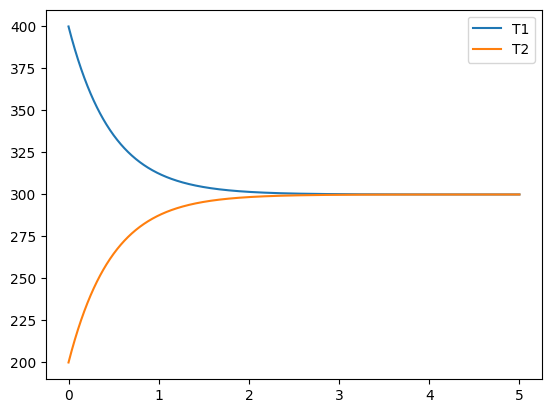

In [9]:
plt.plot(t,T1,label = "T1")
plt.plot(t,T2,label = "T2")
plt.legend()

## e)

In [7]:
T1[-1]

300.0030030333491